<a href="https://colab.research.google.com/github/100477706/Proyecto_Aprendizaje/blob/main/predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. IDENTIFICACIÓN DE ESTUDIANTES**

**Grupo de Trabajo**: 27

Gabriel José Rivera Amor - 100477706@alumnos.uc3m.es

Santiago José Díaz Rodríguez - 100479095@alumnos.uc3m.es

# **1. CARGA DE DATOS**

Mediante este apartado realizamos la carga de datos al Google Collab teniendo en cuenta que en cada ingreso a la aplicación se debe realizar la carga del dataset.

En este apartado se descomprime el archivo que se ha subido y se muestran los datos por pantalla.

In [ ]:
!ls

attrition_availabledata_06.csv.gz  sample_data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import metrics
import numpy as np
import time

In [ ]:
df = pd.read_csv("attrition_availabledata_06.csv.gz", compression="gzip", sep=",") #subir el archivo comprimido
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.896431,5,3,3,2.0,4.0,3.0,33,Travel_Rarely,Research & Development,...,Y,13,8,0,6.0,3,5,1,4,No
1,6.114877,19,3,3,3.0,3.0,3.0,20,Travel_Rarely,Research & Development,...,Y,13,8,1,2.0,2,2,2,2,No
2,6.396730,11,3,3,1.0,4.0,4.0,46,Travel_Rarely,Research & Development,...,Y,11,8,1,28.0,2,7,4,3,Yes
3,5.722452,22,4,3,1.0,1.0,4.0,40,Travel_Rarely,Sales,...,Y,13,8,1,9.0,2,8,7,1,No
4,5.663001,21,3,3,4.0,4.0,3.0,38,Travel_Frequently,Research & Development,...,Y,17,8,3,10.0,2,10,9,9,No


# **2. EDA**

En este apartado vamos a llevar a cabo Exploratory Data Analysis (EDA), el cual nos va a ayudar a entender el conjunto de datos antes de aplicar cualquier modelo o hipótesis de prueba. El EDA nos va a permitir establecer las tendencias, correlaciones y anomalías que se pueden encontar en los datos. Con este tipo de análisis podemos determinar cuál son los métodos a implementar y cuáles son las features indicadas a utilizar y que den una información relevante al momento de evaluar el modelo a desarrollar.

A continuación mostramos el contenido del archivo para verificar la cantidad de filas y columnas que tenemos, donde adicionalmente queremos verificar el tipo de datos que tenemos en nuestra base de datos. Para ello mostramos la información referente al contenido de la tabla.

In [ ]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2921 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2913 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14

A continuación utilizamos la función de descripción del dataset para que por cada una de las features (Columnas), podamos obtener valores estadísticos que nos permiten describir la función sabiendo los valores medios, la desviación y el cómo se distribuye los datos por cada feature. Adicionalmente es útil para el Exploratory Data Analysis (EDA), ya que nos ayuda a comprender las características de los datos antes de implementar el modelo.

In [ ]:
# Información total del dataset
print("\nContenido del Dataset:")
df.describe()


Contenido del Dataset:


,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2921.000000,2928.000000,2913.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2926.000000,2940.000000,2940.0,2940.000000,2936.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.311828,12.688095,2.734014,3.156463,2.716878,2.705601,2.766564,36.959864,9.271088,2.909864,...,64855.948980,2.713260,15.256463,8.0,0.803741,11.469005,2.789456,7.042177,2.215986,4.117347
std,1.340066,5.494808,0.714883,0.363355,1.090252,1.098222,0.703519,9.137364,8.113162,1.024888,...,46800.380469,2.493371,3.652041,0.0,0.858827,7.837689,1.279125,6.125843,3.269241,3.563764
min,5.416880,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.262869,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,29405.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,6.997414,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,...,49070.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.896439,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,82240.000000,4.000000,18.000000,8.0,1.000000,16.000000,3.000000,10.000000,3.000000,7.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


A continuación, procedemos con la contabilizacón de la cantidad de variables e instancias distintas que tenemos en el dataset, de tal forma de darnos una idea general de los datos con los que procederemos a trabajar.

In [ ]:
# Cantidad de variables e instancias
print(f"\nEl dataset tiene {df.shape[0]} instancias y {df.shape[1]} variables.")


El dataset tiene 2940 instancias y 31 variables.


Sabiendo los datos que tenemos a disposición, entonces vamos a proceder con identificar las variables que tiene nuestro modelo, clasificándolas como categóricas o numéricas. Este proceso nos va a permitir determinar si es necesaria una estandarización, decidir cuál es el mejor modelo para evaluar los datos que se tienen y corregir las variables numéricas en el caso de tener datos erróneos.

In [ ]:
# Identificar tipos de variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nVariables categóricas: {categorical_vars}")
print(f"\nVariables numéricas: {numerical_vars}")


Variables categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']

Variables numéricas: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Sabiendo y conociendo bien los diferentes tipos de variables que tenemos presente, ahora procedemos a identificar aquellas variables categóricas que tengan una alta cardinalidad. Es importante recordar que aquellas variables que tienen una alta cardinalidad son aquellas que tienen un gran número de valores únicos y lo cual nos ayuda a conocer si es necesario hacer agrupamientos para evitar que el entrenamiento del modelo se dificulte.

In [ ]:
# Identificar variables categóricas con alta cardinalidad
high_cardinality_vars = [col for col in categorical_vars if df[col].nunique() > 10]
print(f"\nVariables categóricas con alta cardinalidad: {high_cardinality_vars}")


Variables categóricas con alta cardinalidad: []


In [ ]:
# Identificar variables numéricas con alta cardinalidad (muchos valores únicos)
high_cardinality_numerical = [col for col in numerical_vars if df[col].nunique() > df.shape[0] * 0.9]
print(f"\nVariables numéricas con alta cardinalidad: {high_cardinality_numerical}")


Variables numéricas con alta cardinalidad: ['hrs', 'EmployeeID']


Posteriormente para realizar la limpieza de los datos, es necesario detectar aquellos valores que sean nulos, ya que estos pueden gerar inconvenientes al momento de hacer el entrenamiento del modelo. Luego de tener esta información, podemos decidir eliminar, imputar o gestionar dichos datos de tal forma que no generen errores al momento de contruir el modelo. Mediante la siguinte implementación, podemos conocer por cada una de las features, el número de valores nulos existentes.  

In [ ]:
# Valores nulos
missing = df.isnull().sum()
missing = missing[missing > 0]
if not missing.empty:
    print("\nValores nulos por columna:")
    print(missing)
else:
    print("\nNo hay valores nulos en el dataset.")


Valores nulos por columna:
EnvironmentSatisfaction    19
JobSatisfaction            12
WorkLifeBalance            27
NumCompaniesWorked         14
TotalWorkingYears           4
dtype: int64


Luego, evaluamos si existe alguna columna de las presentes en el dataset proporcionado que tenga la condición de ser constante. Es importante mencionar que una columna constante es aquella que todas sus filas contienen un mismo valor. Por otro lado también tenemos la verificación de la existencia de una columna que contiene un código de verificación que identifica de alguna forma a los empleados de la empresa, siendo este un ID.

La identificación de estos dos tipos de columnas nos va a servir para retirarlas de la muestra con la que se entrenará el modelo, ya que estos dos tipos antes mencinados no genera ningún tipo de valor al modelo que se desea construir.

In [ ]:
# Identificar columnas constantes
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"\nColumnas constantes: {constant_cols}")

# Identificar columnas de ID
id_cols = [col for col in df.columns if 'id' in col.lower() or df[col].is_unique]
print(f"\nColumnas de ID: {id_cols}")


Columnas constantes: ['EmployeeCount', 'Over18', 'StandardHours']

Columnas de ID: ['EmployeeID']


Con este último apartado, pretendemos establecer si el problema al que nos estamos enfretando es de clasificación o de regresión. Con ello buscamos definir correctamente el modelo que queremos implementar y los elementos que se deben considerar para lograrlo, por lo que verificamos si "Attrition" es categórica o numérica. Adicionalmente, verificamos la distribución de la función objetivo de tal forma de verificar si esta se encuentra desbalancaeda o no.

Como se puede verificar a continuación, dado que la variable Attrition es categórica, entonces estamos ante un problema de clasificación, donde se puede verificar que nuestra función objetivo está desbalanceada, ya que tenemos un número muy alto de "No" contra muy pocos "Yes". Esto último nos va a permitir saber si el modelo debe ajustarse o no.


El problema es de clasificación.

Distribución de la variable objetivo:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

La variable objetivo está desbalanceada.


<ipython-input-41-1dd7eb712a7c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Attrition'], palette='coolwarm')


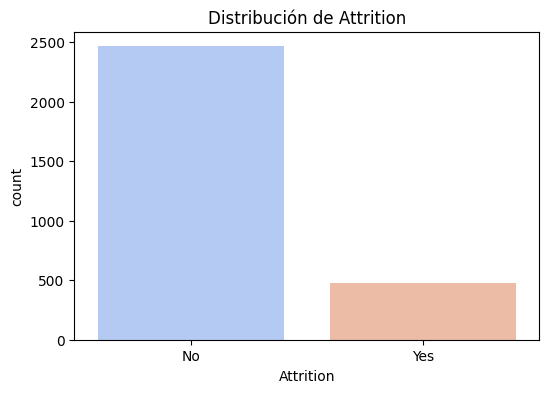

In [41]:
# Determinar si es un problema de clasificación o regresión
if df['Attrition'].dtype == 'object' or df['Attrition'].nunique() < 10:
    print("\nEl problema es de clasificación.")

    # Evaluar desbalance de clases
    class_counts = df['Attrition'].value_counts(normalize=True)
    print("\nDistribución de la variable objetivo:")
    print(class_counts)
    if class_counts.min() < 0.3:
        print("\nLa variable objetivo está desbalanceada.")
else:
    print("\nEl problema es de regresión.")

# Visualización de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x=df['Attrition'], palette='coolwarm')
plt.title('Distribución de Attrition')
plt.show()


# **3. PROCESO DE EVALUACIÓN**

## **3.1. Estimacion del Rendimiento Futuro**

Para este apartado es necesario considerar el proceso utilizado para la estimación del rendmiento futuro, buscando asegurar que nuestro modelo se evalúe de manera realista en datos que no ha analizado con anterioridad. La idea principal es enterenar al modelo con un conjunto de datos y evaluarlo con otro, ya que si se hiciera con el mismo, puede dar una estimación sesgada del rendimiento real.

Para lograr esto, hacemos una partición entre los elementos del dataset que disponemos, donde dividimos el conjunto de ejemplos se va a dividir en dos conjuntos y cuyos elementos se escogen aleatoriamente del conjunto disponible. Esto nos va a permitir establecer un conjunto de métricras que van a permitir evaluar el problema de forma consecuente y concreta.

La primera de estás métricas se conoce como **balanced accuracy**, la cual utilizaremos ya que conocemos del EDA que las clases se encuentran desbalanceadas. Este procedimiento nos va a permitir que el modelo no prediga que los datos de prueba siempre dan como resultado "NO", sino que le coloque el mismo peso al "SI" como al "NO". Para ello, es necesario tener en consideración la métrica de los datos que indica que los datos han sido correctamente identificados como positivos (TPR) y crrectamente identificados como negativos (TNR).

Esto lo hacemos ya que para obtener la **balanced accuracy** es necesario hacer la media entre la TPR y la TNR (TPR + TPN / 2). La idea de hacer este proceso es que se pueda evaluar el rendimiento del modelo de forma justa en el caso de clases desbalanceadas y que el modelo pueda aprender verdaderamente a distinguir entre ambas clases presentes y no la mayoritaria.

Teniendo en consideración que se debe obtner el TPR y TPN, entonces también será necesario obtener las matrices de confunsión, las cuales nos permiten saber el rendimiento del modelo de clasificación que vamos a aplicar en los siguientes apartados, ya que nos va a dar información acerca del acierto de las predicciones, clasificándolas como falsos postivos, falsos negativos, verdadero negativo o verdadero positivo. Este procedimiento se realiza para entender los errores del modelo y poder calcular el TPR (definido como TPR = TP / TP + FN) y el TNR (definido como TPR = TN / TN + FP), los cuales son necesarios para verificar que el modelo evalue de forma justa.

## **3.2. División de Datos entre Train y Test**

Para poder llevar a cabo el holdout es necesario implementar una división de los datos en dos conjuntos y escogidos de forma aleatoria. La idea principal es establecer un conjunto de datos que serán aquellos con los que entrenaremos el modelo y se realizará con 2/3 de los datos disponibles. Luego tendremos el conjunto de prueba, el cual está compuesto por un 1/3 de los datos disponibles y que van a prbar que el modelo funciona correctamente y hace la estimación correcta.

El objetivo principal de realizar esta operación es evitar el sobreajuste o overfitting, el cual se da cuando entrenamos con todos los datos disponibles y el modelo se "entrena" memorizando los datos envés de identifacar los patrones principales. Esto va a generar que al momento de introducir nuevos datos al modelo, este sea incapaz de dar una solución, ya que solo tiene solución para los datos con los que practicó y no para cualquier dato.

Por ende, es necesario realizar la división en los dos conjuntos, ya que gracias a ella somos capaces de verificar que nuestro modelo no solo hace una buena predicción con los datos de entrenamiento, sino que también lo hace con un conjunto de datos que es nuevo y que el modelo desconoce. Si el modelo hace las predicciones correctas, entonces nuestra estructura considerará un modelo con los datos de train y test.

Sabiendo esto, entonces debemos determinar los modelos que se van a evaluar y cuál de ellos es la mejor opción para lo que estamos buscando obtener.

## **3.3. Evaluación Interna**

Para poder llevar a cabo la evaluación interna es necesario conocer cada uno de los procesos para poder llevarlo a cabo, teniendo en cuenta que es necesario evaluar diferentes tipos de métodos y los cuales tienen especificaciones variadas. Para ello, también es necesario considerar la forma en que se dividen los datos para el entrenamiento de los modelos.

Primeramente, es necesario que al conjunto de datos es necesario realizarle un preprocesado con la finalidad de gestionar correctamente las NaN, así como la converción de datos categóricos a numéricos para que lso modelos sean capaces de gestionar los datos.

Luego, es importante mencionar que cada modelo se evaluará mediante dos formas. En la primera no se va a modificar ningún hiperparámetro, lo que se conoce como omisión de hiperparámetros. La idea es que se utilicen los parámetros por defecto, entrenar el modelo a través del proceso de validación cruzada y obtener la precisión al realizar el entrenamiento.

Por otro lado, la segunda forma de evaluación sería mediante la optimización de los hiperparámetros (HPO), donde se prevee modificar los diferentes elementos que regulan el entrenamiento de los modelos. Cada método de entrenamiento tiene unos hiperparámetros, los cuales se modificarán de forma que mejoren los resultados de precisión de entrenamiento y verificar cual es la mejor combinación. En este caso también se realiza utilizando GridSearch, el cual realiza una validación cruzada pero con cada uno de las combinaciones de hiperparámetros posible.

Teniendo en cuenta estos procesos de evaluación, elegiremos un modelo que tenga la mayor precisión de predicción (Balanced-Accuracy), y el cual premita tener una estimación correcta para la empresa. Luego, estos datos se someterán al proceso de evaluación con Holdout con tal de comparar con los datos de train y test para establecer el modelo final. A continuación entonces llevaremos la evaluación de tipo inner en cada uno de los métodos disponibles.

# **4. MÉTODOS BÁSICOS: KNN AND TREES**

## **4.1. Elección de Métodos del KNN**

Para iniciar este proceso es necesario dividir en los conjuntos de train y test, como se mencionó en el apartado anterior, donde debemos retirar de esta división aquellas columnas que no agregan ningún valor relevante al entrenamiento del modelo. Estas columnas son aquellas que pudimos revisar en el EDA que son constantes o, mejor definido, que todas las filas de dicha columna tienen el mismo valor.

Adicionalmente, se debe retirar la columna que identifica a los empleados, ya que, esta columna no tiene ningún aporte al modelo que deseamos implementar.

Por último, pero no menos importante, debemos realizar una modificación a la variable objetivo ya que nos va a permitir saber con un valor binario si se adapta a uno u otro caso, con la finalidad de mostrar el desbalanceo existente en el dataset y poder realizar el preprocesado de los datos.

In [ ]:
# Columnas constantes y de ID
irrelevant_cols = ['Attrition', 'EmployeeID', 'EmployeeCount', 'StandardHours', 'Over18']
categorical_vars = [col for col in categorical_vars if col not in irrelevant_cols]
numerical_vars = [col for col in numerical_vars if col not in irrelevant_cols]

# Retiramos las columnas innecesarias y hacemos la división entre train y test
X = df.drop(columns=irrelevant_cols)
# Como la variable 'Attrition' es YES o NO, entonces la convertimos a un valor
# binario para el modelo
y = df['Attrition'].map({'Yes': 1, 'No': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=100477706)

Una vez realizada la división de los datos disponibles en los dos conjuntos de train y test, con una pequeña línea de código verificamos que la función se encuentra totalmente desbalanceada. Es importante mencionar que el resultado obtenido es la proporción de cada uno de los valores binarios que se definieron para la columna de 'Attrition' en el apartado anterior.  

In [ ]:
y_train.value_counts(normalize=True)

,proportion
Attrition,
0,0.838776
1,0.161224


Una vez que hacemos este proceso, pasamos al preprocesado de los datos mediante el uso de las Pipelines. Estas van a establecer el tratamiento de los datos de variables categóricas y numéricas en el caso de encontrarse con un NaN, para el modelo KNN.

Para poder llevar a cabo el entrenamiento del modelo, primero es imperativo decidir cuál de los modelos es el que da mejores resultados. Para ello usamos el método de validación cruzada para verificar el cuál de los métodos existentes es el más apropiado.

Por otro lado, es importante mencionar que en el apartado 3 se mencionó que utilizaríamos el método de Holdout para la fase de entrenamiento, y se puede prestar a confunsión que ahora se mencione el uso de la validación cruzada. Por ello, es importante hacer un insiso en este aspecto, destacando que usamos la validación cruzada para verificar el mejor método, pero al momento de hacer el entrenamiento final, se va a hacer uso del Holdout.

Por otro lado, tenemos una modificación importante que se le realiza al dataset que consiste en otorgarle un valor númerico a las variables categóricas, ya que los modelos de Machine Learning no pueden procesar dichas variables. Para lograrlo, se aplica el proceso de One-Hot Encoding, el cual consiste en crear columnas binarias para cada una de las variables categóricas.

Teniendo esto en cuenta, en el código que se encuentra a continuación se podrá observar como haremos todas las combinaciones entre los tres métodos de escalado y los dos de imputación.

In [ ]:
# Establecemos una lista de los métodos de escaldo
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]

# Establecemos una lista de los métodos de imputación
imputer_strategies = ['mean', 'median']  # Changed to strings

# Establecemos un diccionario para el KNN
# con la combinación entre el método de escalado y el de imputación.
# El resultado de las estimaciones son las claves del diccionario
pipelines_knn = {}

for scaler in scalers:
    for imputer_strategy in imputer_strategies:  # Iterate over strings
        # Hacemos el preprocesado
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', Pipeline([
                    ('imputer', SimpleImputer(strategy=imputer_strategy)),  # Pass string to strategy
                    ('scaler', scaler)
                ]), numerical_vars),
                ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_vars)
            ]
          )
        pipeline_knn = Pipeline([
            ('preprocessor', preprocessor),
            ('knn', KNeighborsClassifier())
        ])

    # Guardamos los resultados en el diccionario
        pipelines_knn[f"{scaler.__class__.__name__} + {imputer_strategy}"] = pipeline_knn

Una vez establecido el preprocesamiento de los datos y el manejo de variables NaN, entonces podemos llevar a cabo la elección del mejor de los métodos para el KNN, a través del método de validación cruzada.

In [ ]:
# Evaluación con validación cruzada para encontrar el mejor preprocesamiento
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=100477706)

# Guardamos en estas variables el mejor score y preprocesado
best_knn_score = 0
best_knn_preprocess = None

for name in pipelines_knn.keys():
    knn_score = np.mean(cross_val_score(pipelines_knn[name], X_train, y_train, cv=cv, scoring='balanced_accuracy'))

    if knn_score > best_knn_score:
        best_knn_score = knn_score
        best_knn_preprocess = name
    print(f"Preprocesado KNN: {name} con balanced accuracy de {knn_score:.4f}")

Preprocesado KNN: MinMaxScaler + mean con balanced accuracy de 0.5621
Preprocesado KNN: MinMaxScaler + median con balanced accuracy de 0.5618
Preprocesado KNN: StandardScaler + mean con balanced accuracy de 0.5596
Preprocesado KNN: StandardScaler + median con balanced accuracy de 0.5580
Preprocesado KNN: RobustScaler + mean con balanced accuracy de 0.5664
Preprocesado KNN: RobustScaler + median con balanced accuracy de 0.5664


Se debe mencionar de lo que se puede apreciar de código algunos aspectos importantes que nos van a ayudar a entender el proceso que estamos llevando a cabo. Primeramente, es necesario mencionar que usamos el "StratifiedKFold" envés del "KFold" ya que sabemos por el EDA que estamos ante un problema desblanceado, por lo que es preferible utilizar el primero de estos dado que ayuda a que la distribución de las clases sea similar y evita el surgimiento de errores futuros.

Por otro lado, podemos observar después de su ejecución la cantidad de elementos que se encuentran clasificados correctamente con cada una de las combinaciones entre métodos de escalado y de imputación. De todos los resultados obtenidos, es necesario establecer cuál de las combinaciones es la más idónea.  

In [ ]:
# Establecemos cuál de las combinaciones es la que tiene mejor accuracy
print(f"\nMejor preprocesamiento para KNN: {best_knn_preprocess} con balanced accuracy de {best_knn_score:.4f}")


Mejor preprocesamiento para KNN: RobustScaler + mean con balanced accuracy de 0.5664


Una vez determinado la mejor combinación de métodos para que el modelo a entrenar tenga un mejor accuracy, entonces establecemos que el modelo KNN que se utilizará para el entrenamiento será el de "RobustScaler" como método de escalado, combinado con "mean" como método de imputación.

## **4.2. Comparación entre el KNN y Decision Trees**

Una vez que se ha establecido el método KNN que se va a utilizar para el entrenamiento del modelo, vamos a establecer las diferencias entre el uso de KNN y Árboles de Decisión (Trees). Para lograrlo, primero estableceremos una evaluación en la cual no se considera modificar los hiperparámetros y posteriormente otra en la que si se ven modificados. En este caso para el KNN utilizaremos la combinación antes mencionada y consideraremos la validación cruzada para la evaluación del inner. Lo mismo realizaremos con la combinación considerada para el árbol de derivación.

### **4.2.a. Evaluación con Hiperparámetros por Omisión**

Para realizar la primera evaluación, se debe considerar que simplemente realizamos el entrenamiento del modelo con el método de KNN y luego con los Árboles de Derivación. Es importante mencionar que en el punto 4.1, se adelantó el proceso de división del conjunto de datos disponibles en Train y Test, así como la decisión del método idóneo de preprocesado para cada uno de los modelos que estamos comprobando.

Sin embargo, es necesario llevar a cabo nuevamente la ejecución del preprocesado con el uso de las pipelines, para imputar los valores NaN de las variables categóricas y numéricas.

Posteriormente se mide el tiempo de entrenamiento del modelo KNN, obtenemos una predicción y verificamos los resulatados.

#### **· Modelo KNN**

In [ ]:
# Evaluación con validación cruzada para encontrar el mejor accuracy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=100477706)

# Preprocesador para datos numéricos: imputación con la mediana + escalado robusto
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Preprocesador para datos categóricos: OneHotEncoding
cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar ambos en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_vars),
    ('cat', cat_transformer, categorical_vars)
])

# Pipeline final con preprocesamiento y modelo KNN
knn_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Medimos el tiempo de entrenamiento
start_time_KNN = time.time()
scores_knn = cross_val_score(knn_pipe, X_train, y_train, scoring='balanced_accuracy', cv=cv)
end_time_KNN = time.time()
training_time_KNN = end_time_KNN - start_time_KNN

# Imprimimos los resultados del cross-validation y el tiempo
print(f"\033[1mEvaluación del modelo KNN\033[0m")
print(f"Todos los accuracies son: {scores_knn}")
print(f"La precisión promedio de la validación cruzada es: {scores_knn.mean():.2f} ± {scores_knn.std():.2f}")
print(f"El tiempo de entrenamiento es de {training_time_KNN:.2f} segundos")

Evaluación del modelo KNN
Todos los accuracies son: [0.57121953 0.58175182 0.57770247]
La precisión promedio de la validación cruzada es: 0.58 ± 0.00
El tiempo de entrenamiento es de 0.12 segundos


Una vez realizamos el entrenamiento del modelo KNN, podemos verificar que la precisión promedio del modelo es de alrededor del 58% y adicionalmente tiene un desviación estándar baja, lo que implica que el modelo es consistente con sus predicciones



Una vez vistos los resultados obtenidos del entrenamiento con el modelo KNN, entonces procedemos a realizar el mismo procedimiento con Árboles de Derivación. Es importante mencionar que se debe llevar a cabo nuevamente el preporcesado de los datos para poder verificar correctamente los distintos aspectos a evaluar.

#### **· Modelo Decision Trees**

In [ ]:
# Evaluación con validación cruzada para encontrar el mejor accuracy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=100477706)

# Preprocesador para datos numéricos: imputación con la mediana + escalado robusto
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Pipeline para datos categóricos: OneHotEncoder para convertir a numérico
cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinamos ambos en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_vars),
    ('cat', cat_transformer, categorical_vars)
])

# Creamos el pipeline final con preprocesamiento + DecisionTreeClassifier
dt_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=100477706))
])

# Medimos el tiempo de entrenamiento
start_time_dt = time.time()
scores_dt = cross_val_score(dt_pipe, X_train, y_train, scoring='balanced_accuracy', cv=cv)
end_time_dt = time.time()
training_time_dt = end_time_dt - start_time_dt

# Imprimimos los resultados del cross-validation y el tiempo
print(f"Todos los accuracies son: {scores_dt}")
print(f"La precisión promedio de la validación cruzada es: {scores_dt.mean():.2f} ± {scores_dt.std():.2f}")
print(f"El tiempo de entrenamiento es de {training_time_dt:.2f} segundos")

Todos los accuracies son: [0.70422462 0.74231839 0.80382343]
La precisión promedio de la validación cruzada es: 0.75 ± 0.04
El tiempo de entrenamiento es de 0.13 segundos


Una vez realizamos el entrenamiento del modelo de Árboles de Derivación, podemos verificar que la precisión promedio del modelo es de alrededor del 75% y adicionalmente tiene un desviación estándar baja, lo que implica que el modelo es consistente con sus predicciones

#### **· Evaluación Preliminar de Resultados**

Después de obtener ambos resultados, podemos destacar varios aspectos que son evidentes y que son necesarios de considerar. Primeramente se puede observar que el Accuracy del modelo KNN es menor que el que se evidencia en el Derivation Tree, por lo que se puede afirmar que el árbol de derivación tiene mucha mayor probabilidad de acertar la predicción que el KNN.

Sin embargo, es necesario mencionar que la desviación estándar obtenida con los árboles de derivación es ligeramente mayor que la del modelo KNN, por lo que el primero tiene una mayor consistencia en sus predicciones que el segundo.

Por otro lado, se puede destacar que el coste computacional del modelo KNN es menor al de los árboles de derivación, dado que este último tarda más tiempo en entrenarse que el primero.

Con todo esto, podemos proceder a realizar un análisis similar pero modificando los paramétros y con ello, podremos obtener una conclusión clara del mejor modelo a aplicar entre el KNN y los Derivation Trees.

### **4.2.b. Evaluación con Ajustes de Hiperparámetros**

Una vez verificado el comportamiento de los modelos teniendo en consideración que los hiperparámetros no se veían modificados, entonces procedemos a modificar ligeramente los hiperparámetros del KNN y de los árboles para verificar en cómo los cambios generan la mejora o el empeoramiento de los resultados del "balanced-accuray" y del tiempo de ejecución.

Para ello, procedemos a modificar el KNN teniendo en consideración el método seleccionado en el primer apartado de esta sección y considerando la variación solo del número de vecinos. Es decir, vamos a modificar la K del modelo, donde vamos a considerar la evaluación de más vecinos, y para ello es necesario realizar nuevamente el pipeline del KNN.

#### **· Modelo KNN**

In [ ]:
# Preprocesador para datos numéricos: imputación con la mediana + escalado robusto
num_transformer_knn_HPO = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Preprocesador para datos categóricos: OneHotEncoding
cat_transformer_knn_HPO = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar ambos en un ColumnTransformer
preprocessor_knn_HPO = ColumnTransformer([
    ('num', num_transformer_knn_HPO, numerical_vars),
    ('cat', cat_transformer_knn_HPO, categorical_vars)
])

# Pipeline final con preprocesamiento y modelo KNN
knn_pipe_HPO = Pipeline([
    ('preprocessor', preprocessor_knn_HPO),
    ('knn', KNeighborsClassifier())
])

A continuación establecemos los hiperparametros que vamos a modificar, así como sus valores. Como para el KNN solo vamos a modificar el número de vecinos, entonces procedemos a establecer los valores que vamos a usar. Para ello, habíamos tomado el valor por defecto de la K en el apartado anterior, pero en este caso usaremos los valores que están en un rango entre 1 y 20.

Adicionalmente podremos observar que hacemos el uso del "grid search", el cual con la ayuda de la validación cruzada, nos ayuda a comparar la mejor combinación con respecto a la variacón de los hiperparámetros evitando el sobreajuste.

In [ ]:
# Establecemos los valores a utilizar en la modificación del hiperparámetro
param_grid_knn = {'knn__n_neighbors': range(1, 20)}

# Establecemos cómo se va a hacer el cross-validation
cv_HPO = StratifiedKFold(n_splits=3, shuffle=True, random_state=100477706)

# Hacemos el Grid Search con la variación de los hiperparámetros
gs_knn = GridSearchCV(knn_pipe_HPO,
                      param_grid_knn,
                      cv=cv_HPO,
                      scoring='balanced_accuracy',
                      n_jobs=1, verbose=1
                      )

# Medimos el tiempo de entrenamiento del modelo
time_start_knn_HPO = time.time()
gs_knn.fit(X_train, y_train)
time_end_knn_HPO = time.time()
knn_training_time_HPO = time_end_knn_HPO - time_start_knn_HPO

Fitting 3 folds for each of 19 candidates, totalling 57 fits


Por último, imprimos los resultados con respecto al tiempo que llevo realizar el proceso de "grid search", así como el entrenamiento con dichos hiperparámetros. Adicionalemente, verificamos cuál fue el mejor ajuste de hiperparámetros con respecto a cuál de ellos da un resultado más ajustado a las predicciones.

In [ ]:
print(f"\033[1mEvaluación del modelo KNN con HPO\033[0m")
print(f"Mejor KNN n_neighbors: {gs_knn.best_params_}")
print(f"Balanced Accuracy: {gs_knn.best_score_:.4f}")
print(f"Tiempo de entrenamiento: {knn_training_time_HPO:.4f} segundos")

Evaluación del modelo KNN con HPO
Mejor KNN n_neighbors: {'knn__n_neighbors': 1}
Balanced Accuracy: 0.7624
Tiempo de entrenamiento: 4.9949 segundos


Dados los resultados obtenidos, podemos verificar que con K=1 siendo el mejor ajuste y con respecto al apartado anterior donde los hiperparámetros no se modificaban, tenemos una mejora en la exactitud o ajuste de los resultados a la predicción. Teníamos que antes el "accuracy" no llegaba al 60% y ahora es del 76%.

Lo único que ha desmejorado significativamente ha sido el tiempo, ya que ahora el entrenamiento tiene un coste computacional mayor y se evidencia en la tardanza del proceso.

#### **· Modelo Decision Trees**

Habiendo visto los resultados con respecto al KNN, procedemos ahora a realizar el mismo proceso con los árboles de derivación. Para ello, procedemos a modificar el árbol de derivación teniendo en consideración la variación de la profundidad del árbol con "max_depth" y el número mínimo de muestras para la división de un nodo con "min_samples_split".

In [ ]:
# Pipeline para datos numéricos: imputación con la mediana + escalado estándar
num_transformer_dt_HPO = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Pipeline para datos categóricos: OneHotEncoder para convertir a numérico
cat_transformer_dt_HPO = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinamos ambos en un ColumnTransformer
preprocessor_dt_HPO = ColumnTransformer([
    ('num', num_transformer_dt_HPO, numerical_vars),
    ('cat', cat_transformer_dt_HPO, categorical_vars)
])

# Creamos el pipeline final con preprocesamiento + DecisionTreeClassifier
dt_pipe_HPO = Pipeline([
    ('preprocessor', preprocessor_dt_HPO),
    ('classifier', DecisionTreeClassifier(random_state=100477706))
])

Una vez realizado nuevamente el pipeline, entonces procedemos a ejecutar los cambios en los hiperparámetros. Para el "max_depth" la idea es verificar cómo se comporta el árbol con variación en su profundiad, dentro de un rango y empezando con valores pequeños de profundidad para terminar con valores bastantes elevados.

Por otro lado, usaremos el mismo rango para "min_samples_split" de tal forma que se pueda restringir el crecimiento del árbol los nodos internos.

In [ ]:
# Establecemos los valores a utilizar en la modificación de los hiperparámetros
param_grid_dt = {'classifier__max_depth': [2, 4, 6, 8, 10, 12, 14],
                 'classifier__min_samples_split': [2, 4, 6, 8, 10, 12, 14]}

# Establecemos cómo se va a hacer el cross-validation
cv_HPO = StratifiedKFold(n_splits=3, shuffle=True, random_state=100477706)

# Hacemos el Grid Search con la variación de los hiperparámetros
gs_dt = GridSearchCV(dt_pipe_HPO,
                      param_grid_dt,
                      cv=cv_HPO,
                      scoring='balanced_accuracy',
                      n_jobs=1, verbose=1
                      )

# Medimos el tiempo de entrenamiento
start_time_dt_HPO = time.time()
gs_dt.fit(X_train, y_train)
end_time_dt_HPO = time.time()
training_time_dt_HPO = end_time_dt_HPO - start_time_dt_HPO

Fitting 3 folds for each of 49 candidates, totalling 147 fits


Por último, imprimos los resultados con respecto al tiempo que llevo realizar el proceso de "grid search", así como el entrenamiento con dichos hiperparámetros. Adicionalemente, verificamos cuál fue el mejor ajuste de hiperparámetros con respecto a cuál de ellos da un resultado más ajustado a las predicciones.

In [ ]:
print(f"\033[1mEvaluación del modelo Decision Trees con HPO\033[0m")
print("Mejor KNN max_depth y min_samples_split:")
print(f"{gs_dt.best_params_}")
print(f"Balanced_Accuracy: {gs_dt.best_score_:.4f}")
print(f"Tiempo de entrenamiento: {training_time_dt_HPO:.4f} segundos")

Evaluación del modelo Decision Trees con HPO
Mejor KNN max_depth y min_samples_split:
{'classifier__max_depth': 14, 'classifier__min_samples_split': 4}
Balanced_Accuracy: 0.7480
Tiempo de entrenamiento: 5.6768 segundos


Dados los resultados obtenidos, podemos verificar que con una profundidad de 14 y una división de 2, siendo el mejor ajuste y con respecto al apartado anterior donde los hiperparámetros no se modificaban, tenemos una desmejora en la exactitud de la predicción.

Asímismo podemos verificar que la precisión del modelo ha disminuído ligeramente con respecto a la evaluación por omisión de hiperparámetros, ya que pasamos de un 75% a un 74% en esta evaluación.

También se evidencia una clara desmejoría en el tiempo, ya que ahora el entrenamiento tiene un coste computacional mayor y se evidencia en la tardanza del proceso.

### **4.2.c. Gráficas de Evaluación de Modelos**



En este apartado se pretende visualizar un conjunto de gráficas que demuestren como la variación de los hiperparámetros genera una variación en la precisión de los resultados de las predicciones. Para ello, debemos tener en consideración los ánalisis de la mejor cobinación de hiperparámetros del apartado anterior con el KNN y con los Árboles de Decisión.

#### **· Modelo KNN**

Primeramente, revisaremos el caso del modelo KNN en el cual solo se lleva a cabo la modificación del hiperparámetro relacionados al valor de la K o de los vecinos más cercanos donde se hace la predicción. Para ello, levantamos una gráfica en la cual podemos ver como varía el número de hijos con respecto al "balanced-accuracy".

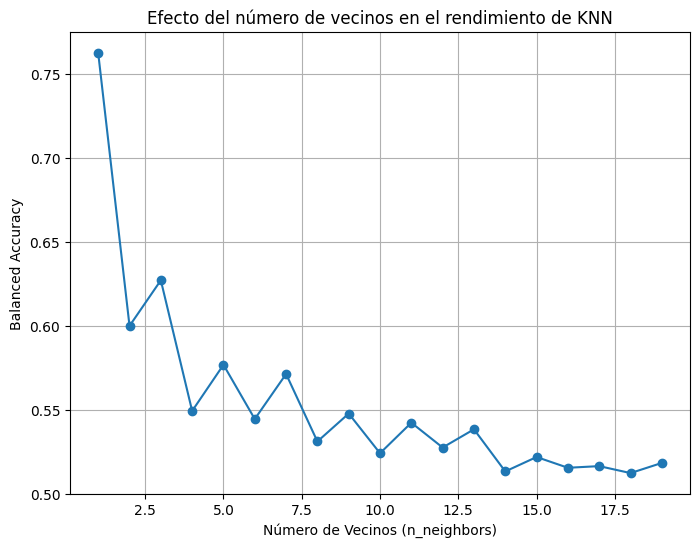

In [ ]:
# Extraemos los resultados del grid search
results = gs_knn.cv_results_

# Hacemos el plot
plt.figure(figsize=(8,6))
plt.plot(results['param_knn__n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('Número de Vecinos (n_neighbors)')
plt.ylabel('Balanced Accuracy')
plt.title('Efecto del número de vecinos en el rendimiento de KNN')
plt.grid(True)
plt.show()

Como se puede observar en la gráfica, a mayor número de vecinos, el "Balanced Accuracy" desmejora. Esto ocurre debido a que ante pocos vecinos, el modelo es más sensible a detalles locales y puede detectar mejor patrones pequeños. Con respecto a un número de vecinos muy grande, este analiza un número muy grande de datos, incluso aquellos que son muy lejanos, lo que provoca una imprecisión elevada a raíz del desbalanceo que tiene este problema.

Sin embargo, es importante destacar que en todos los casos se puede decir que el modelo aprende, ya que siempre se encuentra sobre el umbral del 50% del "Balanced Accuracy", pero claramente es mucho mejor tener una precisión mayor al 75% que una más baja.

En conclusión, se puede afirmar que el mejor KNN con modificación de parámetros es que la K sea de un solo vecino. Esto también lo pudimos observar en los resultados del apartado anterior.

Adicionalmente para el caso del KNN vamos a considerar una gráfica que nos permite hacer una comparación entre los resultados del KNN obtenido por el GridSearch y aquel por omisión de hiperparámetros.

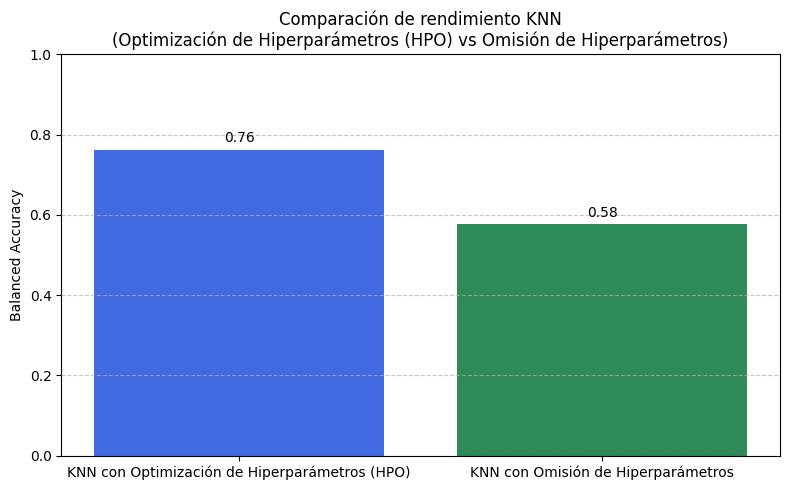

In [ ]:
# Obtenemos el mejor score del GridSearch
best_accuracy_gridsearch = gs_knn.best_score_

# Obtenemos el promedio de accuracy del cross_val_score
mean_accuracy_crossval = scores_knn.mean()

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 5))

# Establecemos los datos a graficar
models = ['KNN con Optimización de Hiperparámetros (HPO)', 'KNN con Omisión de Hiperparámetros']
accuracies = [best_accuracy_gridsearch, mean_accuracy_crossval]

# Creamos el barplot
bars = ax.bar(models, accuracies, color=['royalblue', 'seagreen'])

# Agregamos etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Separación hacia arriba
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Personalizamos el gráfico
ax.set_ylim(0, 1)
ax.set_ylabel('Balanced Accuracy')
ax.set_title('Comparación de rendimiento KNN\n(Optimización de Hiperparámetros (HPO) vs Omisión de Hiperparámetros)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

Mediante este gráfico podemos observar como los resultados obtenidos mediante el método de variación de hiperparámetros tiene un mejor "Balanced Accuracy" que aquel realizado por omisión de hiperparámetros. Por ello podemos afirmar que con el método GridSearch y analizando un solo vecino, obtenemos un modelo más preciso en las predicciones.

#### **· Modelo Decision Trees**

Por otro lado, analizaremos en este apartado el caso de los árboles de decisión y el cómo surte efecto la variación de los hiperparámetros realizada en el apartado anterior. Es importante recordar que para este caso, se llevó a cabo la modificación de "max-depth" y de "min-samples-split".

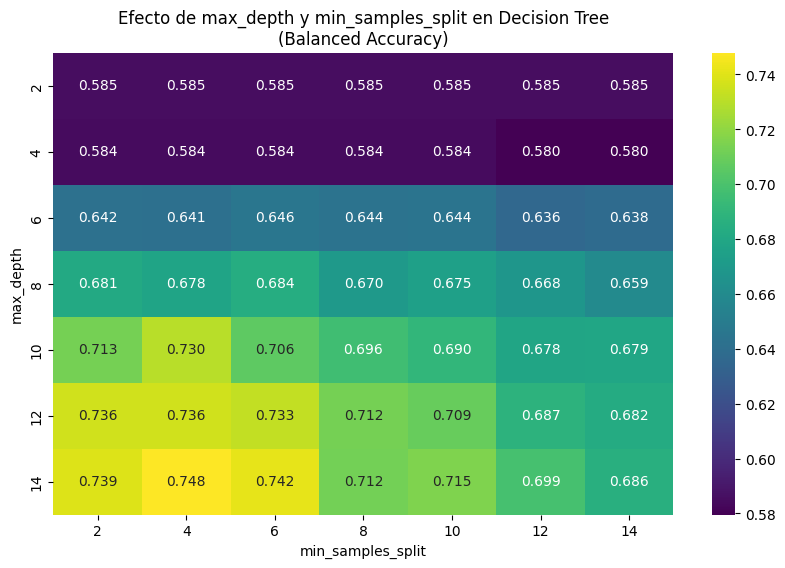

In [ ]:
# Extraemos los resultados del GridSearchCV de Decision Tree
results_dt = pd.DataFrame(gs_dt.cv_results_)

# Creamos una tabla dinámica para el heatmap
pivot_dt = results_dt.pivot_table(
    index='param_classifier__max_depth',
    columns='param_classifier__min_samples_split',
    values='mean_test_score'
)

# Plot del heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_dt, annot=True, fmt=".3f", cmap='viridis')
plt.title('Efecto de max_depth y min_samples_split en Decision Tree\n(Balanced Accuracy)')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.show()

Teniendo en cuenta el gráfico mostrado, podemos observar que en el eje de las ordenadas tenemos los distintos valores del hiperparámetro de "max-depth", el cual se encuentra en orden descendente. Por otro lado, tenemos que el eje de las abscisas se encuentran los diferentes valores del hiperparámetro "min-samples-split" y el cual está ordenado de forma ascendente. Por último podemos ver que cada casilla cuenta con el "Balanced-Accuracy" que se genera con el aporte de ambos hiperparámetros y el color de cada una representa que tan bueno es la precisión, siendo el color morado la más baja y el amarillo la más alta como se observa en la leyenda.

Como se puede obsrvar del gráfico generado, podemos afirmar que la mejor configuración de hiperparámetros es cuando la profundidad tiene un valor de 14 y el "min-samples-split" un valor de 4, lo que provoca que la precisión se posicione con el mayor de los valores de la tabla.

El valor de la profundidad es bastante elevado ya que con valores bajos, el modelo no puede capturar la verdadera complejidad de los datos y eso es lo que provoca la baja precisión en la parte superior de la gráfica. También es importante mencionar que ante altas profundidades, el árbol puede tender al sobreajuste, por lo que habiendo llegado a la profundidad de 14, es suficiente para verificar toda la complejidad de los datos sin llegar a un sobreajuste.

Por otro lado, teniendo en cuenta el hiperparámetro que regula el número de muestras necesarias para poder dividir, podemos verificar que ante un número bajo de muestras, se tiene más flexibilidad y libertad para hacer divisiones. Además, esto provoca considerar toda la complejidad de los datos sin entrar en el sobreajuste.

La combinación de estos dos datos, genera que el árbol esté preparado y entrenado para datos de alta complejidad sin entrar en un problema de sobreajuste del modelo a los mismos.

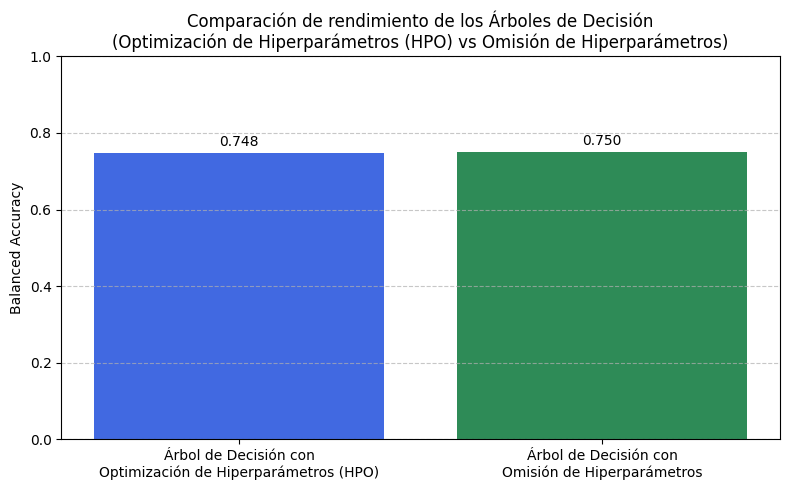

In [ ]:
# Obtenemos el mejor score del GridSearch
best_accuracy_gridsearch = gs_dt.best_score_

# Obtenemos el promedio de accuracy del cross_val_score
mean_accuracy_crossval = scores_dt.mean()

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 5))

# Establecemos los datos a graficar
models = ['Árbol de Decisión con\nOptimización de Hiperparámetros (HPO)', 'Árbol de Decisión con\nOmisión de Hiperparámetros']
accuracies = [best_accuracy_gridsearch, mean_accuracy_crossval]

# Creamos el barplot
bars = ax.bar(models, accuracies, color=['royalblue', 'seagreen'])

# Agregamos etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Separación hacia arriba
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Personalizamos el gráfico
ax.set_ylim(0, 1)
ax.set_ylabel('Balanced Accuracy')
ax.set_title('Comparación de rendimiento de los Árboles de Decisión\n(Optimización de Hiperparámetros (HPO) vs Omisión de Hiperparámetros)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

Por último, se puede observar en la gráfica que la diferencia entre ambos resultados es bastante cercana, por lo que podemos decir que usar cualquiera de las dos formas es indeferente. Sin embargo, es importante decir que aquella que se hace con omisión de parámetros, tiene una mejor precisión al predeicir los datos, pero tiene una desviación típica de 0,04. Esto hace que este modelo tenga ligeros errores en la predicción, pero por el tiempo de ejecución, es mucho mejor utilizar el de omisión de parámetros, ya que como podremos ver a continuación, el tiempo de ejecución del HPO es mucho mayor.

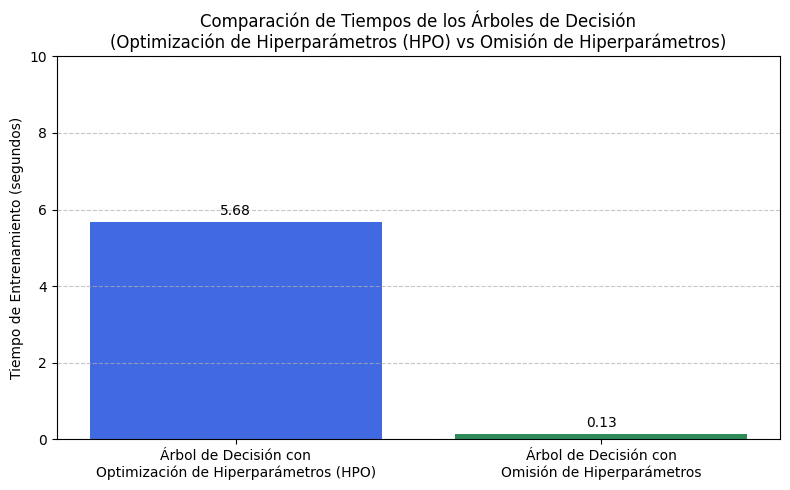

In [ ]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 5))

# Establecemos los datos a graficar
models = ['Árbol de Decisión con\nOptimización de Hiperparámetros (HPO)', 'Árbol de Decisión con\nOmisión de Hiperparámetros']
accuracies = [training_time_dt_HPO, training_time_dt]

# Creamos el barplot
bars = ax.bar(models, accuracies, color=['royalblue', 'seagreen'])

# Agregamos etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Separación hacia arriba
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Personalizamos el gráfico
ax.set_ylim(0, 10)
ax.set_ylabel('Tiempo de Entrenamiento (segundos)')
ax.set_title('Comparación de Tiempos de los Árboles de Decisión\n(Optimización de Hiperparámetros (HPO) vs Omisión de Hiperparámetros)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

#### **· Evaluación Preliminar de Gráficas**

Una vez vistos la representación gráfica de cada uno de los casos, podemos realizar una última representación en la cual podremos observar la diferencia entre los dos mejores modelos obtenidos entre el KNN y los Árboles de Derivación. Esto nos va a permitir tener un panorama más claro para la conclusión final acerca de los modelos básicos.

Para ello, vamos a tomar las conclusiones preliminares de cada uno de los modelos como lo hemos observado anteriormente y planteamos una representación en donde tenemos el "Balanced Accuracy" del modelo KNN realizado con optimización de hiperparámetros, considerando un solo vecino, y el modelo de los árboles de decisión con omisión de hiperparámetros.

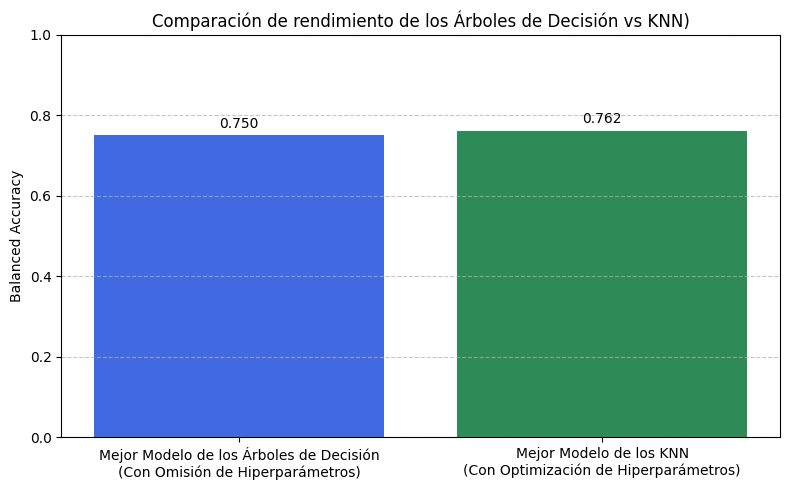

In [ ]:
# Obtenemos el mejor modelo de KNN
best_accuracy_knn = gs_knn.best_score_

# Obtenemos el mejor modelo de los Decision Trees
best_accuracy_dt = scores_dt.mean()

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 5))

# Establecemos los datos a graficar
models = ['Mejor Modelo de los Árboles de Decisión\n(Con Omisión de Hiperparámetros)', 'Mejor Modelo de los KNN\n(Con Optimización de Hiperparámetros)']
accuracies = [best_accuracy_dt, best_accuracy_knn]

# Creamos el barplot
bars = ax.bar(models, accuracies, color=['royalblue', 'seagreen'])

# Agregamos etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Separación hacia arriba
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Personalizamos el gráfico
ax.set_ylim(0, 1)
ax.set_ylabel('Balanced Accuracy')
ax.set_title('Comparación de rendimiento de los Árboles de Decisión vs KNN)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

Como podemos observar en el gráfico, se puede afirmar que por una ligera diferencia de un 1.2%, el modelo KNN con optimización de hiperparámetros es el modelo que predice de forma más precisa los resultados, teniendo en cuenta solamente la evaluación de tipo inner.

Sin embargo, es necesario saber que aunque sea más precisa, es un modelo que tiene una carga computacional mucho mayor al otro. Por ende en la conclusión se debe analizar si la carga computacional compensa la ligera mejoría en la precisión

Por ahora, entonces lo último que mostraremos es la carga computacional que tiene el modelo KNN con respecto al de los árboles.

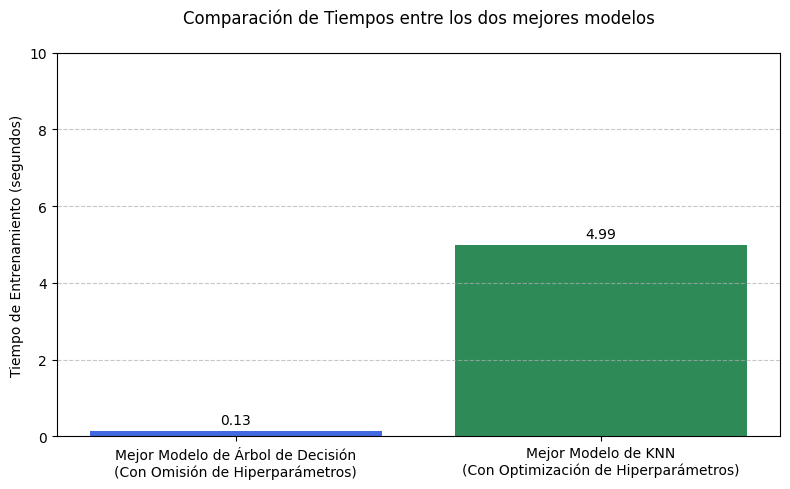

In [ ]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 5))

# Establecemos los datos a graficar
models = ['Mejor Modelo de Árbol de Decisión\n(Con Omisión de Hiperparámetros)', 'Mejor Modelo de KNN\n(Con Optimización de Hiperparámetros)']
accuracies = [training_time_dt, knn_training_time_HPO]

# Creamos el barplot
bars = ax.bar(models, accuracies, color=['royalblue', 'seagreen'])

# Agregamos etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Separación hacia arriba
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Personalizamos el gráfico
ax.set_ylim(0, 10)
ax.set_ylabel('Tiempo de Entrenamiento (segundos)')
ax.set_title('Comparación de Tiempos entre los dos mejores modelos\n')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

Teniendo todo lo mencinado anteriormente, entonces procedemos a concluir cuál de los modelos que se nos han presentado en esta fase es mejor para llevar a cabo las predicciones y que tenga la mejor precisión.

## **4.3. Conclusión de los Métodos Básicos**

Después de haber analizado todos los métodos básicos, entonces es necesario explicar brevemente las conclusiones finales dados los resultados obtenidos a partir de las representaciones gráficas y del entrenamiento de difrentes modelos con distintas especificaciones.

Primeramente es necesario establecer que todos los modelos que se producieron tenían un mínimo de aprendizaje. Esto lo sabemos gracias a que los resultados del "Balanced Accuracy" arrojaron que todos se encontraban por encima del umbral del 50%, lo que permite afirmar que todos los modelos son mejores que los triviales/naive/dummy, ya que estos tienen una precisión de aproximadamente el 50%. Gracias a esta referencia podemos medir que tan bueno es un modelo o que tan malo puede ser.

Dado que los mejores modelos de cada uno de los tipos de métodos básicos, su precisioón supera o es igual al 75%, entonces podemos afirmar que estos modelos aprendieron de los datos y son mucho mejores que lso métodos triviales.

Por otro lado, con respecto a la mejora que se produce a raíz de la optimización de hiperparámetros, es necesario decir que depende del valor que se le otorgue al hiperparámetro. No en todos los casos existía una mejora importante de la precisión, ya que por ejemplo en el caso del KNN, cuando se aumentaba el número de vecinos a más de 3, los resultados eran extremadamente peores que los obtenidos mediante la omisión de hiperparámetros.

Sin embargo, sí que es cierto que los resultados mejoraban significativamente teniendo en cuenta menos de cuatro vecinos, lo que provocó que el mejor modelo KNN fuese optimizando el hiperparámetro del número de vecinos y situándolo con el valor de 1. El único problema es que esta mejora solo se produce teniendo un coste computacional mayor que en el caso de omitir los parámetros.

En el caso de los árboles de decisión, todas las combinaciones resultantes eran peor que omitir los hiperparámetros, ya que ninguna pudo superar el 75% de precisión que este último alcanzaba. Por ello, se puede afirmar que en el caso de los árboles no hizo ningún efecto modificar los hiperparámetros.

Por último, pero no menos importante, pudimos estudiar en el apartado anterior los mejores modelos de cada uno de los tipos básicos. Pudimos observar que el mejor modelo es el KNN Optimizando el Hiperparámetro de número de vecinos a uno, pero el cual tiene un coste computacional bastante elevado en comparación al árbol de decisión con omisión de hiperparámetros.

Teniendo en cuenta estos aspectos y después de un riguroso análisis, pudimos concluir que el mejor modelo a elegir sería el KNN con HPO, ya que de cara a la empresa que requiere un modelo para predecir el abandono de sus empleados, creemos que debe imperar la precisión de la predicción sobre el coste computacional elevado.

# **5. MÉTODOS AVANZADOS: LINEALES Y SVMs**

**explicación**

Una vez evaluados los modelos básicos de aprendizaje, entonces precedemos a verificar aquellos métodos que tienen un procesamiento un poco más complejo que los antes vistos....

##**5.1 Evaluación con parámetros por omisión**

###**5.1.a Modelos lineal sin regularización L1**

In [ ]:
# Evaluación con validación cruzada para encontrar el mejor accuracy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=100477706)

# Preprocesador para datos numéricos: imputación con la mediana + escalado robusto
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Preprocesador para datos categóricos: OneHotEncoding
cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar ambos en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_vars),
    ('cat', cat_transformer, categorical_vars)
])

# Pipeline final con preprocesamiento y modelo de regresión lineal sin regularización (penalty=None)
linear_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('clasiffier', LogisticRegression(penalty=None))
])

# Medimos el tiempo de entrenamiento
start_time_Linear = time.time()
scores_linear = cross_val_score(linear_pipe, X_train, y_train, scoring='balanced_accuracy', cv=cv, error_score='raise')
end_time_Linear = time.time()
training_time_Linear = end_time_Linear - start_time_Linear

# Imprimimos los resultados del cross-validation y el tiempo
print(f"\033[1mEvaluación del modelo de regresión lineal sin regularización\033[0m")
print(f"Todos los accuracies son: {scores_linear}")
print(f"La precisión promedio de la validación cruzada es: {scores_linear.mean():.2f} ± {scores_linear.std():.2f}")
print(f"El tiempo de entrenamiento es de {training_time_Linear:.2f} segundos")

Evaluación del modelo de regresión lineal sin regularización
Todos los accuracies son: [0.61184754 0.61548488 0.61306048]
La precisión promedio de la validación cruzada es: 0.61 ± 0.00
El tiempo de entrenamiento es de 0.15 segundos


###**5.1.b Modelos lineal con regularización L1**

In [ ]:
# Evaluación con validación cruzada para encontrar el mejor accuracy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=100477706)

# Preprocesador para datos numéricos: imputación con la mediana + escalado robusto
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Preprocesador para datos categóricos: OneHotEncoding
cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar ambos en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_vars),
    ('cat', cat_transformer, categorical_vars)
])

# Pipeline final con preprocesamiento y modelo de regresión lineal con regularización L1 (penalty='l1')
L1_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('clasiffier', LogisticRegression(penalty='l1', solver='liblinear'))
])

# Medimos el tiempo de entrenamiento
start_time_L1 = time.time()
scores_L1 = cross_val_score(L1_pipe, X_train, y_train, scoring='balanced_accuracy', cv=cv, error_score='raise')
end_time_L1 = time.time()
training_time_L1 = end_time_L1 - start_time_L1

# Imprimimos los resultados del cross-validation y el tiempo
print(f"\033[1mEvaluación del modelo de regresión lineal con regularización L1\033[0m")
print(f"Todos los accuracies son: {scores_L1}")
print(f"La precisión promedio de la validación cruzada es: {scores_L1.mean():.2f} ± {scores_L1.std():.2f}")
print(f"El tiempo de entrenamiento es de {training_time_L1:.2f} segundos")

Evaluación del modelo de regresión lineal con regularización L1
Todos los accuracies son: [0.60606321 0.6048488  0.60738617]
La precisión promedio de la validación cruzada es: 0.61 ± 0.00
El tiempo de entrenamiento es de 0.53 segundos


###**5.1.c SVMs**

In [ ]:
# Evaluación con validación cruzada para encontrar el mejor accuracy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=100477706)

# Preprocesador para datos numéricos: imputación con la mediana + escalado robusto
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Preprocesador para datos categóricos: OneHotEncoding
cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar ambos en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_vars),
    ('cat', cat_transformer, categorical_vars)
])

# Pipeline final con preprocesamiento y la SVM
svc_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('clasiffier', SVC())
])

# Medimos el tiempo de entrenamiento
start_time_svc = time.time()
scores_svc = cross_val_score(svc_pipe, X_train, y_train, scoring='balanced_accuracy', cv=cv, error_score='raise')
end_time_svc = time.time()
training_time_svc = end_time_svc - start_time_svc

# Imprimimos los resultados del cross-validation y el tiempo
print(f"\033[1mEvaluación de la SVM\033[0m")
print(f"Todos los accuracies son: {scores_svc}")
print(f"La precisión promedio de la validación cruzada es: {scores_svc.mean():.2f} ± {scores_svc.std():.2f}")
print(f"El tiempo de entrenamiento es de {training_time_svc:.2f} segundos")

Evaluación de la SVM
Todos los accuracies son: [0.60955791 0.59361314 0.6086114 ]
La precisión promedio de la validación cruzada es: 0.60 ± 0.01
El tiempo de entrenamiento es de 0.61 segundos


# **ANEXO: DECLARACIÓN DE USO DE IA**

Para esta labor se utilizó la Inteligencia Artificial para la realización de las representaciones gráficas referentes a la comparación de los resultados obtenidos en la optimización de hiperparámetros con respecto a los datos de omisión de hiperparámetros. En esa misma línea se utilizaron para el gráfico que representa la modificación dos hiperparámetros al mismo tiempo, como en el caso de los árboles de decisión.